In [1]:
import pandas as pd
import numpy as np
import os
import sys
import re
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2
from matplotlib_venn import venn3

In [2]:
def get_reverse(nucleotyde):
    nucleotyde = str(nucleotyde)
    nucleotyde_rev = {'A' : 'T',
                     'T' : 'A',
                     'C' : 'G',
                     'G': 'C'}
    return nucleotyde_rev[nucleotyde]

In [3]:
print(get_reverse('G'))

C


In [4]:
vcf_res = "MTB_Base_Calibration_List.vcf"
mediating_res = "MTB_Resistance_Mediating.txt"
laura_res = "Lista_MUTs_Resistencia.csv"
extended_res = "MTB_Extended_Resistance_Mediating.txt"


In [5]:
def extract_gene_name(info):
    info_fields = re.findall(r'GENE=(Rv..\d{2}c?):', info)
    return ("").join(info_fields)

In [6]:
#Test function
extract_gene_name("REG=coding;SVTYPE=SNP;GENE=Rv0005:gyrB:5123:")

'Rv0005'

In [7]:
vcf = pd.read_csv(vcf_res, sep='\t', skiprows=[7], header=7)
vcf['Antibiotic'] = vcf['INFO'].str.split(";RES=").str[-1]
vcf = vcf[(~vcf['Antibiotic'].str.startswith("phylo"))]
vcf['ALT']=vcf['ALT'].str.upper()
vcf['Gene'] = vcf['INFO'].apply(lambda x: extract_gene_name(x))
vcf['Isreverse'] = vcf['Gene'].apply(lambda x: True if x.endswith("c") else False)

med = pd.read_csv(mediating_res, sep='\t', header=0)
med['Antibiotic'] = med['Antibiotic'].astype(str)
med = med[(med['Variant position genome stop'] != "-") & (~med['Antibiotic'].str.startswith("phylo"))]
med['Variant position genome stop'] = med['Variant position genome stop'].astype(int)
#med['Var. base'] = med['Var. base'].astype(str)
med['ALT']=med['Var. base'].str.upper()
med['Isreverse'] = med['Dir.'].apply(lambda x: True if x == "-" else False)

lau = pd.read_csv(laura_res, sep='\t', header=0)
lau['Antibiotic'] = lau['Antibiotic'].astype(str)
lau = lau[(lau['Variant position genome stop'] != "-") & (~lau['Antibiotic'].str.startswith("phylo"))]
lau['Variant position genome stop'] = lau['Variant position genome stop'].astype(int)

ext = pd.read_csv(extended_res, sep='\t', header=0)

## Check Gene names not retrieved

In [8]:
vcf[~vcf['Gene'].str.startswith("Rv")] #If empty all Gene names have been extracted

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,Antibiotic,Gene,Isreverse


In [9]:
ext.head()

,H37Rv gene,start,stop,type,Rv number,coding strand,associated antibiotic resistance,comment,length,region analyzed in reference collection
0,gyrB upstream,4998,5239,intergenic,-,forward,fluoroquinolones (FQ),-,242,-
1,gyrB,5240,7267,CDS,Rv0005,forward,fluoroquinolones (FQ),-,2028,-
2,gyrA upstream,7268,7301,intergenic,-,forward,fluoroquinolones (FQ),-,34,-
3,gyrA,7302,9818,CDS,Rv0006,forward,fluoroquinolones (FQ),-,2517,-
4,mshA upstream,575301,575347,intergenic,-,forward,ethionamide (ETH),-,47,-


## Chech Gene is reverse

In [10]:
print(len(vcf['Gene'][vcf['Gene'].str.endswith("c")]))

108


In [11]:
print(len(vcf['Gene'][vcf['Isreverse'] == True]))

108


In [12]:
print(len(vcf['Gene'][vcf['Isreverse'] == False]))

151


In [13]:
print(len(vcf.index.values))

259


## Apply reverse if Gene is reverse

In [14]:
for i in vcf.index:
    alt_nucleotyde = vcf.loc[i, "ALT"]
    if vcf.loc[i, "Isreverse"] == True:
        vcf.loc[i,'ALT2'] = get_reverse(alt_nucleotyde)
    elif vcf.loc[i, "Isreverse"] == False:
        vcf.loc[i,'ALT2'] = alt_nucleotyde
        
for i in med.index:
    alt_nucleotyde = med.loc[i, "ALT"]
    if med.loc[i, "Isreverse"] == True:
        med.loc[i,'ALT2'] = get_reverse(alt_nucleotyde)
    elif med.loc[i, "Isreverse"] == False:
        med.loc[i,'ALT2'] = alt_nucleotyde

In [15]:
vcf

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,Antibiotic,Gene,Isreverse,ALT2
0,MTB_anc,6575,.,c,T,.,.,REG=coding;SVTYPE=SNP;GENE=Rv0005:gyrB:5123:72...,fluoroquinolones_(FQ),Rv0005,False,T
1,MTB_anc,6576,.,g,A,.,.,REG=coding;SVTYPE=SNP;GENE=Rv0005:gyrB:5123:72...,fluoroquinolones_(FQ),Rv0005,False,A
2,MTB_anc,6579,.,c,T,.,.,REG=coding;SVTYPE=SNP;GENE=Rv0005:gyrB:5123:72...,fluoroquinolones_(FQ),Rv0005,False,T
3,MTB_anc,6579,.,c,A,.,.,REG=coding;SVTYPE=SNP;GENE=Rv0005:gyrB:5123:72...,fluoroquinolones_(FQ),Rv0005,False,A
4,MTB_anc,6620,.,g,A,.,.,REG=coding;SVTYPE=SNP;GENE=Rv0005:gyrB:5123:72...,fluoroquinolones_(FQ),Rv0005,False,A
5,MTB_anc,6734,.,g,A,.,.,REG=coding;SVTYPE=SNP;GENE=Rv0005:gyrB:5123:72...,fluoroquinolones_(FQ),Rv0005,False,A
6,MTB_anc,6738,.,c,A,.,.,REG=coding;SVTYPE=SNP;GENE=Rv0005:gyrB:5123:72...,fluoroquinolones_(FQ),Rv0005,False,A
7,MTB_anc,6738,.,c,T,.,.,REG=coding;SVTYPE=SNP;GENE=Rv0005:gyrB:5123:72...,fluoroquinolones_(FQ),Rv0005,False,T
8,MTB_anc,6742,.,a,T,.,.,REG=coding;SVTYPE=SNP;GENE=Rv0005:gyrB:5123:72...,fluoroquinolones_(FQ),Rv0005,False,T
9,MTB_anc,6749,.,g,A,.,.,REG=coding;SVTYPE=SNP;GENE=Rv0005:gyrB:5123:72...,fluoroquinolones_(FQ),Rv0005,False,A


In [16]:
vcf.ALT[0]

'T'

In [17]:
med

,Variant position genome start,Variant position genome stop,Var. type,Number,WT base,Var. base,Region,Gene ID,Gene Name,Gene start,...,AA change,Codon change,Variant position gene start,Variant position gene stop,Antibiotic,Reference PMID,High Confidence SNP,ALT,Isreverse,ALT2
0,6575,6575,SNP,1,c,t,coding,Rv0005,gyrB,5240,...,Arg446Cys,cgt/tgt,1336,1336,fluoroquinolones (FQ),19470506,NaN,T,False,T
1,6620,6620,SNP,1,g,c,coding,Rv0005,gyrB,5240,...,Asp461His,gac/cac,1381,1381,fluoroquinolones (FQ),24055765,yes,C,False,C
2,6620,6620,SNP,1,g,a,coding,Rv0005,gyrB,5240,...,Asp461Asn,gac/aac,1381,1381,fluoroquinolones (FQ),19721073,yes,A,False,A
3,6621,6621,SNP,1,a,c,coding,Rv0005,gyrB,5240,...,Asp461Ala,gac/gcc,1382,1382,fluoroquinolones (FQ),24055765,yes,C,False,C
4,6734,6734,SNP,1,a,g,coding,Rv0005,gyrB,5240,...,Asn499Asp,aac/gac,1495,1495,fluoroquinolones (FQ),17412727,yes,G,False,G
5,6735,6735,SNP,1,a,c,coding,Rv0005,gyrB,5240,...,Asn499Thr,aac/acc,1496,1496,fluoroquinolones (FQ),24055765,yes,C,False,C
6,6736,6736,SNP,1,c,g,coding,Rv0005,gyrB,5240,...,Asn499Lys,aac/aag,1497,1497,fluoroquinolones (FQ),24055765,yes,G,False,G
7,6737,6737,SNP,1,a,c,coding,Rv0005,gyrB,5240,...,Thr500Pro,acc/ccc,1498,1498,fluoroquinolones (FQ),24055765,yes,C,False,C
8,6738,6738,SNP,1,c,a,coding,Rv0005,gyrB,5240,...,Thr500Asn,acc/aac,1499,1499,fluoroquinolones (FQ),24055765,yes,A,False,A
9,6741,6741,SNP,1,a,t,coding,Rv0005,gyrB,5240,...,Glu501Val,gaa/gta,1502,1502,fluoroquinolones (FQ),19721073,yes,T,False,T


In [18]:
#med['Var. base']=med['Var. base'].str.upper()
#df['Season2'] = df['Season'].apply(lambda x: split_it(x))
#med['Var. base'] = map(lambda x: str(x).upper(), med['Var. base'])

In [19]:
#med

# Check conditions in dataframe

In [20]:
#df.loc[df.column_name condition, 'new column name'] = 'value if condition is met'

#med.loc[med['Dir.'] == "-", 'Isreverse'] = True

In [21]:
#df['new column'] = df['df column_name'].apply(lambda x: 'value if condition is met' if x condition else 'value  not met')
#df['equal_or_lower_than_4?'] = df['set_of_numbers'].apply(lambda x: 'True' if x <= 4 else 'False')

#med['Isreverse'] = med['Dir.'].apply(lambda x: True if x == "-" else False)
#med['ALT2'] = med['Dir.'].apply(lambda x:  if x == "-" else False)

In [22]:
med[med.Isreverse == True]

,Variant position genome start,Variant position genome stop,Var. type,Number,WT base,Var. base,Region,Gene ID,Gene Name,Gene start,...,AA change,Codon change,Variant position gene start,Variant position gene stop,Antibiotic,Reference PMID,High Confidence SNP,ALT,Isreverse,ALT2
102,2102240,2102240,SNP,1,g,a,coding,Rv1854c,ndh,2103042,...,Arg268His,cgc/cac,803,803,isoniazid (INH) ethionamide (ETH),11408244,NaN,A,True,T
103,2102715,2102715,SNP,1,a,g,coding,Rv1854c,ndh,2103042,...,Thr110Ala,acc/gcc,328,328,isoniazid (INH) ethionamide (ETH),11408244,NaN,G,True,C
104,2155167,2155167,SNP,1,c,g,coding,Rv1908c,katG,2156111,...,Ser315Arg,agc/agg,945,945,isoniazid (INH),16870753,NaN,G,True,C
105,2155167,2155167,SNP,1,c,a,coding,Rv1908c,katG,2156111,...,Ser315Arg,agc/aga,945,945,isoniazid (INH),17403134,NaN,A,True,T
106,2155168,2155168,SNP,1,g,c,coding,Rv1908c,katG,2156111,...,Ser315Thr,agc/acc,944,944,isoniazid (INH),8878604,yes,C,True,G
107,2155168,2155168,SNP,1,g,a,coding,Rv1908c,katG,2156111,...,Ser315Asn,agc/aac,944,944,isoniazid (INH),9210694,yes,A,True,T
108,2155168,2155168,SNP,1,g,t,coding,Rv1908c,katG,2156111,...,Ser315Ile,agc/atc,944,944,isoniazid (INH),9210694,yes,T,True,A
109,2155169,2155169,SNP,1,a,g,coding,Rv1908c,katG,2156111,...,Ser315Gly,agc/ggc,943,943,isoniazid (INH),8878604,yes,G,True,C
110,2155206,2155206,SNP,1,c,g,coding,Rv1908c,katG,2156111,...,Ser302Arg,agc/agg,906,906,isoniazid (INH),22646308,NaN,G,True,C
111,2155212,2155212,SNP,1,g,c,coding,Rv1908c,katG,2156111,...,Trp300Cys,tgg/tgc,900,900,isoniazid (INH),22646308,NaN,C,True,G


In [23]:
vcf.dtypes

#CHROM        object
POS            int64
ID            object
REF           object
ALT           object
QUAL          object
FILTER        object
INFO          object
Antibiotic    object
Gene          object
Isreverse       bool
ALT2          object
dtype: object

In [24]:
med.dtypes

Variant position genome start     int64
Variant position genome stop      int64
Var. type                        object
Number                            int64
WT base                          object
Var. base                        object
Region                           object
Gene ID                          object
Gene Name                        object
Gene start                        int64
Gene stop                         int64
Gene length                       int64
Dir.                             object
WT AA                            object
Codon nr.                        object
Codon nr. E. coli                object
Var. AA                          object
AA change                        object
Codon change                     object
Variant position gene start       int64
Variant position gene stop        int64
Antibiotic                       object
Reference PMID                    int64
High Confidence SNP              object
ALT                              object


In [25]:
#lau[~lau['Antibiotic'].str.startswith("phylo")]

In [26]:
vcf.head()

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,Antibiotic,Gene,Isreverse,ALT2
0,MTB_anc,6575,.,c,T,.,.,REG=coding;SVTYPE=SNP;GENE=Rv0005:gyrB:5123:72...,fluoroquinolones_(FQ),Rv0005,False,T
1,MTB_anc,6576,.,g,A,.,.,REG=coding;SVTYPE=SNP;GENE=Rv0005:gyrB:5123:72...,fluoroquinolones_(FQ),Rv0005,False,A
2,MTB_anc,6579,.,c,T,.,.,REG=coding;SVTYPE=SNP;GENE=Rv0005:gyrB:5123:72...,fluoroquinolones_(FQ),Rv0005,False,T
3,MTB_anc,6579,.,c,A,.,.,REG=coding;SVTYPE=SNP;GENE=Rv0005:gyrB:5123:72...,fluoroquinolones_(FQ),Rv0005,False,A
4,MTB_anc,6620,.,g,A,.,.,REG=coding;SVTYPE=SNP;GENE=Rv0005:gyrB:5123:72...,fluoroquinolones_(FQ),Rv0005,False,A


In [40]:
L = set(lau['Variant position genome stop'].values)
M = set(med['Variant position genome stop'].values)
V = set(vcf['POS'].values)

In [41]:
print(len(L), len(M), len(V))

298 298 225


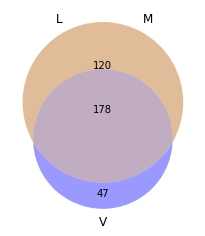

In [42]:
v = venn3([L, M, V], set_labels = ('L', 'M', 'V'), )

In [49]:
extra_V = list(V-M)

In [50]:
print(extra_V)

[1918213, 1918219, 1918220, 1918478, 761106, 1416212, 2288790, 4245147, 761116, 761127, 2155688, 2155306, 1918125, 2288686, 2288815, 6576, 1673393, 412339, 6579, 1918135, 1918136, 2154682, 413498, 1417019, 1673406, 3647041, 1918661, 2155211, 2154700, 2288717, 2289099, 2154445, 4245969, 1918418, 3645524, 2726100, 1673431, 2288860, 4407904, 2726112, 2155234, 2155241, 413807, 6768, 3646959, 1918202, 2288767]


In [51]:
#estra_V_df = vcf[vcf['POS'] in extra_V]
extra_V_df = vcf[vcf['POS'].isin(extra_V)]

In [52]:
count_extra_V = extra_V_df['POS'].value_counts()

In [53]:
count_extra_V.index[count_extra_V.values > 1].tolist()

[1918219, 1918135, 6579, 1918478]

In [54]:
count_extra_V.index[count_extra_V.values > 1].tolist()[2:]

[6579, 1918478]

In [55]:
"""
list_res_position = []
dict_res_position_base = {}

with open("MTB_Base_Calibration_List.vcf", 'r') as f:
    for line in f:
        if line.startswith("#"):
            next(f)
        else:
            list_line = line.split("\t")
            position = list_line[1]
            nucleotide = list_line[4].upper()
            resistance = list_line[-1].split(";RES=")[-1]
            list_res_position.append(position)
            dict_res_position_base[position] = [nucleotide, resistance] 
            #print(position, nucleotide, resistance)

with open("MTB_Resistance_Mediating.txt", 'r') as f:
    for _ in range(1):
        next(f)
    for line in f:
        list_line = line.split("\t")
        if list_line[2] == "SNP":
            position = list_line[1]
            nucleotide = list_line[5].upper()
            resistance = list_line[21]
            if position not in list_res_position and not resistance.startswith("phylo") :
                list_res_position.append(position)
                dict_res_position_base[position] = [nucleotide, resistance]

print(dict_res_position_base)
"""

'\nlist_res_position = []\ndict_res_position_base = {}\n\nwith open("MTB_Base_Calibration_List.vcf", \'r\') as f:\n    for line in f:\n        if line.startswith("#"):\n            next(f)\n        else:\n            list_line = line.split("\t")\n            position = list_line[1]\n            nucleotide = list_line[4].upper()\n            resistance = list_line[-1].split(";RES=")[-1]\n            list_res_position.append(position)\n            dict_res_position_base[position] = [nucleotide, resistance] \n            #print(position, nucleotide, resistance)\n\nwith open("MTB_Resistance_Mediating.txt", \'r\') as f:\n    for _ in range(1):\n        next(f)\n    for line in f:\n        list_line = line.split("\t")\n        if list_line[2] == "SNP":\n            position = list_line[1]\n            nucleotide = list_line[5].upper()\n            resistance = list_line[21]\n            if position not in list_res_position and not resistance.startswith("phylo") :\n                list_res_po

In [56]:
med.head(3)

,Variant position genome start,Variant position genome stop,Var. type,Number,WT base,Var. base,Region,Gene ID,Gene Name,Gene start,...,AA change,Codon change,Variant position gene start,Variant position gene stop,Antibiotic,Reference PMID,High Confidence SNP,ALT,Isreverse,ALT2
0,6575,6575,SNP,1,c,t,coding,Rv0005,gyrB,5240,...,Arg446Cys,cgt/tgt,1336,1336,fluoroquinolones (FQ),19470506,NaN,T,False,T
1,6620,6620,SNP,1,g,c,coding,Rv0005,gyrB,5240,...,Asp461His,gac/cac,1381,1381,fluoroquinolones (FQ),24055765,yes,C,False,C
2,6620,6620,SNP,1,g,a,coding,Rv0005,gyrB,5240,...,Asp461Asn,gac/aac,1381,1381,fluoroquinolones (FQ),19721073,yes,A,False,A


In [57]:
extra_V_df

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,Antibiotic,Gene,Isreverse,ALT2
1,MTB_anc,6576,.,g,A,.,.,REG=coding;SVTYPE=SNP;GENE=Rv0005:gyrB:5123:72...,fluoroquinolones_(FQ),Rv0005,False,A
2,MTB_anc,6579,.,c,T,.,.,REG=coding;SVTYPE=SNP;GENE=Rv0005:gyrB:5123:72...,fluoroquinolones_(FQ),Rv0005,False,T
3,MTB_anc,6579,.,c,A,.,.,REG=coding;SVTYPE=SNP;GENE=Rv0005:gyrB:5123:72...,fluoroquinolones_(FQ),Rv0005,False,A
10,MTB_anc,6768,.,g,C,.,.,REG=coding;SVTYPE=SNP;GENE=Rv0005:gyrB:5123:72...,fluoroquinolones_(FQ),Rv0005,False,C
27,MTB_anc,412339,.,c,G,.,.,REG=coding;SVTYPE=SNP;GENE=Rv0342:iniA:410838:...,ethambutol_(EMB),Rv0342,False,G
28,MTB_anc,413498,.,c,G,.,.,REG=coding;SVTYPE=SNP;GENE=Rv0343:iniC:412757:...,ethambutol_(EMB),Rv0343,False,G
29,MTB_anc,413807,.,c,T,.,.,REG=coding;SVTYPE=SNP;GENE=Rv0343:iniC:412757:...,ethambutol_(EMB),Rv0343,False,T
64,MTB_anc,761106,.,a,C,.,.,REG=coding;SVTYPE=SNP;GENE=Rv0667:rpoB:759807:...,rifampicin_(RMP),Rv0667,False,C
69,MTB_anc,761116,.,a,G,.,.,REG=coding;SVTYPE=SNP;GENE=Rv0667:rpoB:759807:...,rifampicin_(RMP),Rv0667,False,G
71,MTB_anc,761127,.,tc,CA,.,.,REG=coding;SVTYPE=SNP;GENE=Rv0667:rpoB:759807:...,rifampicin_(RMP),Rv0667,False,CA


In [58]:
list_res_position = []
dict_res_position_base = {}
for index in med.index:
    position = med.loc[index,'Variant position genome stop']
    nucleotide = med.loc[index,'ALT2']
    resistance = med.loc[index,'Antibiotic']
    if position in list_res_position:
        list_value_res = dict_res_position_base[position]
        list_value_res.append(nucleotide)
        dict_res_position_base[position] = list_value_res
    else:
        list_res_position.append(position)
        dict_res_position_base[position] = [resistance, nucleotide]
    #print(position, nucleotide, resistance)
for index in extra_V_df.index:
    position = extra_V_df.loc[index,'POS']
    nucleotide = extra_V_df.loc[index,'ALT2']
    resistance = extra_V_df.loc[index,'Antibiotic']
    if position in list_res_position:
        list_value_res = dict_res_position_base[position]
        list_value_res.append(nucleotide)
        dict_res_position_base[position] = list_value_res
    else:
        list_res_position.append(position)
        dict_res_position_base[position] = [resistance, nucleotide]


In [60]:
print(dict_res_position_base)

{6575: ['fluoroquinolones (FQ)', 'T'], 6620: ['fluoroquinolones (FQ)', 'C', 'A'], 6621: ['fluoroquinolones (FQ)', 'C'], 6734: ['fluoroquinolones (FQ)', 'G'], 6735: ['fluoroquinolones (FQ)', 'C'], 6736: ['fluoroquinolones (FQ)', 'G'], 6737: ['fluoroquinolones (FQ)', 'C'], 6738: ['fluoroquinolones (FQ)', 'A'], 6741: ['fluoroquinolones (FQ)', 'T'], 6742: ['fluoroquinolones (FQ)', 'T'], 6749: ['fluoroquinolones (FQ)', 'A'], 6750: ['fluoroquinolones (FQ)', 'T'], 7563: ['fluoroquinolones (FQ)', 'T'], 7564: ['fluoroquinolones (FQ)', 'C'], 7566: ['fluoroquinolones (FQ)', 'A'], 7570: ['fluoroquinolones (FQ)', 'T'], 7572: ['fluoroquinolones (FQ)', 'C'], 7581: ['fluoroquinolones (FQ)', 'C', 'A', 'T'], 7582: ['fluoroquinolones (FQ)', 'G', 'C', 'T'], 575729: ['ethionamide (ETH)', 'T'], 576164: ['ethionamide (ETH)', 'T'], 576242: ['ethionamide (ETH)', 'T'], 576338: ['ethionamide (ETH)', 'T'], 576414: ['ethionamide (ETH)', 'A'], 576429: ['ethionamide (ETH)', 'C'], 760314: ['rifampicin (RMP)', 'T'], 7

In [63]:
with open ('dict_position_resistance_v1.txt', 'w+') as f:
    for k, v in dict_res_position_base.items():
        if not v[0].startswith('phylo'):
            line = str(k).strip() + ":" + ",".join(v) + "\n"
            #print(line)
            f.write(line)

In [67]:
dict_res_v1_test = {}
with open ('dict_position_resistance_v1.txt', 'r') as f:
    for line in f:
        dict_res_v1_test[line.split(":")[0]] = line.split(":")[1].strip().split(",")

In [68]:
dict_res_v1_test

{'6575': ['fluoroquinolones (FQ)', 'T'],
 '6620': ['fluoroquinolones (FQ)', 'C', 'A'],
 '6621': ['fluoroquinolones (FQ)', 'C'],
 '6734': ['fluoroquinolones (FQ)', 'G'],
 '6735': ['fluoroquinolones (FQ)', 'C'],
 '6736': ['fluoroquinolones (FQ)', 'G'],
 '6737': ['fluoroquinolones (FQ)', 'C'],
 '6738': ['fluoroquinolones (FQ)', 'A'],
 '6741': ['fluoroquinolones (FQ)', 'T'],
 '6742': ['fluoroquinolones (FQ)', 'T'],
 '6749': ['fluoroquinolones (FQ)', 'A'],
 '6750': ['fluoroquinolones (FQ)', 'T'],
 '7563': ['fluoroquinolones (FQ)', 'T'],
 '7564': ['fluoroquinolones (FQ)', 'C'],
 '7566': ['fluoroquinolones (FQ)', 'A'],
 '7570': ['fluoroquinolones (FQ)', 'T'],
 '7572': ['fluoroquinolones (FQ)', 'C'],
 '7581': ['fluoroquinolones (FQ)', 'C', 'A', 'T'],
 '7582': ['fluoroquinolones (FQ)', 'G', 'C', 'T'],
 '575729': ['ethionamide (ETH)', 'T'],
 '576164': ['ethionamide (ETH)', 'T'],
 '576242': ['ethionamide (ETH)', 'T'],
 '576338': ['ethionamide (ETH)', 'T'],
 '576414': ['ethionamide (ETH)', 'A'],
 

In [61]:
dict_res_position_confidence = {}
for index in med.index:
    position = med.loc[index,'Variant position genome stop']
    nucleotide = med.loc[index,'ALT2']
    #'High Confidence SNP'

    if med.loc[index,'High Confidence SNP'] == "yes":
        dict_res_position_confidence[position] = nucleotide

In [62]:
print(dict_res_position_confidence)

{6620: 'A', 6621: 'C', 6734: 'G', 6735: 'C', 6736: 'G', 6737: 'C', 6738: 'A', 6741: 'T', 6742: 'T', 6750: 'T', 7563: 'T', 7564: 'C', 7570: 'T', 7572: 'C', 7581: 'T', 7582: 'C', 760314: 'T', 761101: 'T', 761109: 'T', 761110: 'T', 761139: 'T', 761140: 'G', 761155: 'T', 761161: 'C', 761277: 'T', 781687: 'G', 781822: 'G', 1473246: 'G', 1473247: 'T', 1473329: 'T', 1673425: 'T', 1673432: 'C', 1674481: 'G', 2155168: 'A', 2155169: 'C', 2155214: 'C', 2155289: 'G', 2288683: 'G', 2288697: 'G', 2288703: 'C', 2288718: 'G', 2288719: 'C', 2288740: 'G', 2288752: 'G', 2288754: 'G', 2288761: 'G', 2288764: 'G', 2288772: 'C', 2288778: 'C', 2288779: 'T', 2288805: 'A', 2288806: 'G', 2288817: 'A', 2288818: 'C', 2288823: 'G', 2288826: 'C', 2288827: 'G', 2288828: 'C', 2288830: 'G', 2288832: 'G', 2288833: 'C', 2288838: 'T', 2288839: 'G', 2288841: 'A', 2288847: 'T', 2288848: 'A', 2288853: 'C', 2288857: 'A', 2288868: 'C', 2288869: 'A', 2288874: 'G', 2288880: 'G', 2288883: 'G', 2288886: 'T', 2288887: 'C', 2288895: